In [124]:
import pandas as pd
import numpy as np

In [125]:
TEAMS = {"MIBR": 0, 
         "Leviatán": 1, 
         "Sentinels": 2, 
         "NRG Esports": 3, 
         "FURIA": 4, 
         "100 Thieves": 5, 
         "LOUD" : 6, 
         "Evil Geniuses" : 7, 
         "G2 Esports" : 8, 
         "Cloud9" : 9, 
         "KRÜ Esports" : 10, 
         "Titan Esports Club" : 11, 
         "JDG Esports" : 12, 
         "All Gamers" : 13, 
         "TYLOO" : 14, 
         "Bilibili Gaming" : 15, 
         "Wolves Esports" : 16, 
         "Dragon Ranger Gaming" : 17, 
         "Nova Esports" : 18, 
         "FunPlus Phoenix" : 19, 
         "Trace Esports" : 20, 
         "EDward Gaming" : 21, 
         "ZETA DIVISION" : 22, 
         "DRX" : 23, 
         "Team Secret" : 24, 
         "BLEED" : 25, 
         "T1" : 26, 
         "Gen.G" : 27, 
         "Paper Rex" : 28, 
         "Talon Esports" : 29, 
         "Rex Regum Qeon" : 30, 
         "DetonatioN FocusMe" : 31, 
         "Global Esports" : 32, 
         "FUT Esports" : 33, 
         "KOI" : 34, 
         "BBL Esports" : 35, 
         "FNATIC" : 36, 
         "Team Heretics" : 37, 
         "Natus Vincere" : 38, 
         "GIANTX" : 39, 
         "Gentle Mates" : 40, 
         "Team Vitality" : 41, 
         "Team Liquid" : 42, 
         "Karmine Corp": 43}

MAPS = {"Bind" : 0, 
        "Haven" : 1, 
        "Split" : 2, 
        "Ascent" : 3,
        "Icebox" : 4, 
        "Breeze" : 5, 
        "Fracture" : 6, 
        "Abyss" : 7, 
        "Lotus" : 8, 
        "Sunset" : 9, 
        "Pearl" : 10}



In [126]:
data = pd.read_csv("Dataset/maps_scores.csv")
data = data[["Map", "Team A", "Team B", "Team A Score", "Team B Score"]]
data["Team A Delta"] = data["Team A Score"] - data["Team B Score"]
data["Team B Delta"] = data["Team B Score"] - data["Team A Score"]
data.loc[data["Team A Delta"] < 0, "Team A Win Chance"] = 0
data.loc[data["Team A Delta"] > 0, "Team A Win Chance"] = 100
data

,Map,Team A,Team B,Team A Score,Team B Score,Team A Delta,Team B Delta,Team A Win Chance
0,Ascent,MIBR,Leviatán,9,13,-4,4,0.0
1,Icebox,MIBR,Leviatán,7,13,-6,6,0.0
2,Lotus,Sentinels,NRG Esports,13,8,5,-5,100.0
3,Sunset,Sentinels,NRG Esports,14,12,2,-2,100.0
4,Icebox,FURIA,100 Thieves,14,12,2,-2,100.0
...,...,...,...,...,...,...,...,...
1013,Lotus,DRX,Gen.G,8,13,-5,5,0.0
1014,Ascent,Paper Rex,Gen.G,5,13,-8,8,0.0
1015,Split,Paper Rex,Gen.G,13,4,9,-9,100.0
1016,Lotus,Paper Rex,Gen.G,11,13,-2,2,0.0


In [127]:
ACS = pd.read_csv("Dataset/overview.csv")
ACS = ACS[["Match Type", "Map", "Match Name", "Team", "Average Combat Score"]]
ACS.groupby("Team")['Average Combat Score']

In [128]:
TeamAcs = ACS.groupby(["Team", "Map"])['Average Combat Score'].mean().reset_index()
TeamAcs

,Team,Map,Average Combat Score
0,100 Thieves,Abyss,200.400000
1,100 Thieves,Ascent,219.828571
2,100 Thieves,Bind,207.342857
3,100 Thieves,Breeze,226.666667
4,100 Thieves,Haven,197.266667
...,...,...,...
346,ZETA DIVISION,Haven,209.400000
347,ZETA DIVISION,Icebox,183.900000
348,ZETA DIVISION,Lotus,192.914286
349,ZETA DIVISION,Split,171.800000


In [129]:
merged_data = data.merge(TeamAcs, left_on=["Team A", "Map"], right_on=["Team", "Map"], how="left")
merged_data = merged_data.merge(TeamAcs, left_on=["Team B", "Map"], right_on=["Team", "Map"], how="left")
merged_data = merged_data.rename(columns={"Average Combat Score_x" : "Team A ACS", "Average Combat Score_y" : "Team B ACS"})
merged_data.drop(columns=["Team_x", "Team_y"], inplace=True)
merged_data = merged_data.replace({"Team A" : TEAMS, "Team B" : TEAMS, "Map" : MAPS})
merged_data

/var/folders/bc/3xp67nwd5371m_f3nw5xqvrh0000gn/T/ipykernel_71368/2015098582.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data = merged_data.replace({"Team A" : TEAMS, "Team B" : TEAMS, "Map" : MAPS})


,Map,Team A,Team B,Team A Score,Team B Score,Team A Delta,Team B Delta,Team A Win Chance,Team A ACS,Team B ACS
0,3,0,1,9,13,-4,4,0.0,190.500000,214.085714
1,4,0,1,7,13,-6,6,0.0,181.300000,215.240000
2,8,2,3,13,8,5,-5,100.0,211.446154,185.400000
3,9,2,3,14,12,2,-2,100.0,214.225000,196.675000
4,4,4,5,14,12,2,-2,100.0,186.714286,206.880000
...,...,...,...,...,...,...,...,...,...,...
1013,8,23,27,8,13,-5,5,0.0,198.942857,209.428571
1014,3,28,27,5,13,-8,8,0.0,194.583333,206.682353
1015,2,28,27,13,4,9,-9,100.0,213.377778,194.928571
1016,8,28,27,11,13,-2,2,0.0,206.712500,209.428571


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
merged_data = merged_data.drop(["Team A Score", "Team B Score", "Team A Delta", "Team B Delta"], axis=1)
X = merged_data.drop(["Team A Win Chance"], axis = 1)
X

,Map,Team A,Team B,Team A ACS,Team B ACS
0,3,0,1,190.500000,214.085714
1,4,0,1,181.300000,215.240000
2,8,2,3,211.446154,185.400000
3,9,2,3,214.225000,196.675000
4,4,4,5,186.714286,206.880000
...,...,...,...,...,...
1013,8,23,27,198.942857,209.428571
1014,3,28,27,194.583333,206.682353
1015,2,28,27,213.377778,194.928571
1016,8,28,27,206.712500,209.428571


In [132]:
Y = merged_data["Team A Win Chance"]
Y = Y.replace({100.0: 1, 0.0: 0})
Y = Y.astype(int)

Y

0       0
1       0
2       1
3       1
4       1
       ..
1013    0
1014    0
1015    1
1016    0
1017    0
Name: Team A Win Chance, Length: 1018, dtype: int64

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# rf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=True)
# rf.fit(X_train, y_train)
log_regr = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, multi_class='auto')
# log_regr.fit(X_train, y_train)
bag_clf = BaggingClassifier(estimator=log_regr, n_estimators=20, bootstrap=True, warm_start=True)

boost_clf = GradientBoostingClassifier(loss="log_loss", verbose=True)


In [134]:
#Boosting clf
#Uncomment to use
boost_clf.fit(X_train, y_train)
boost_clf_pred = boost_clf.predict(X_test)
accuracy = accuracy_score(y_pred=boost_clf_pred, y_true=y_test)
print(accuracy)

      Iter       Train Loss   Remaining Time 
         1           1.3469            0.31s
         2           1.3155            0.23s
         3           1.2890            0.21s
         4           1.2659            0.19s
         5           1.2462            0.17s
         6           1.2291            0.16s
         7           1.2137            0.16s
         8           1.2010            0.15s
         9           1.1890            0.15s
        10           1.1782            0.15s
        20           1.1145            0.12s
        30           1.0734            0.10s
        40           1.0458            0.08s
        50           1.0247            0.07s
        60           1.0040            0.05s
        70           0.9831            0.04s
        80           0.9558            0.03s
        90           0.9333            0.01s
       100           0.9125            0.00s
0.6601307189542484


In [135]:
#Getting the first 5 data points
filtered_rows = []
team = 1

# Iterate over the DataFrame
for index, row in merged_data.iterrows():
    if row['Team A'] == team or row['Team B'] == team:
        filtered_rows.append(row)
    
    # Stop once we've collected 5 rows
    if len(filtered_rows) == 15:
        break
new_X = merged_data.drop(["Team A Win Chance"], axis = 1)
new_Y = merged_data["Team A Win Chance"]
new_Y = new_Y.replace({100.0: 1, 0.0: 0})
new_Y = new_Y.astype(int)
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)



In [136]:
#Training the boosting model on the new data
boost_clf.fit(new_X, new_Y)

# new_ypred = boost_clf.predict(new_X_test)
#new_accuracy = accuracy_score(y_pred=new_ypred, y_true=new_y_test)
#print("new accuracy", new_accuracy)
custom_data_df_old = pd.DataFrame([[3,1,21,200,205]], columns=new_X_train.columns)
probability_old = boost_clf.predict_proba(custom_data_df_old)[:, 1]
new_ypred = boost_clf.predict(custom_data_df_old)
print("team with prob", new_ypred, probability_old[0])

      Iter       Train Loss   Remaining Time 
         1           1.3483            0.25s
         2           1.3181            0.20s
         3           1.2926            0.18s
         4           1.2706            0.17s
         5           1.2512            0.16s
         6           1.2354            0.15s
         7           1.2221            0.15s
         8           1.2095            0.15s
         9           1.1986            0.14s
        10           1.1893            0.14s
        20           1.1317            0.12s
        30           1.0997            0.10s
        40           1.0742            0.08s
        50           1.0531            0.07s
        60           1.0380            0.06s
        70           1.0218            0.04s
        80           1.0047            0.03s
        90           0.9910            0.01s
       100           0.9738            0.00s
team with prob [0] 0.4570001448770496


In [137]:
#Bagging pred
#uncomment to use 
# bag_clf.fit(X_train, y_train)
# y_pred = bag_clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {np.around(accuracy*100, 2)}%")

In [138]:
# #y_pred = rf.predict(X_test)
# y_pred = log_regr.predict(X_test)
# print(y_pred)
# accuracy = accuracy_score(y_test, y_pred)
# # conf1_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# # fig, ax = plt.subplots()

# # cm_display = ConfusionMatrixDisplay(confusion_matrix=conf1_matrix, display_labels=rf.classes_)
# # cm_display.plot(ax=ax, cmap='Greens')

# print(f"Accuracy: {np.around(accuracy*100, 2)}%")
# # print("Classification Report:")
# # print(report)

In [139]:
random_row = X_train.sample(n=1)
# custom_data = np.array([[8, 10, 5, 13, 11, 2]])
custom_data_df = pd.DataFrame([[3,1,21,200,205]], columns=X_train.columns)
probability_y1 = boost_clf.predict_proba(custom_data_df)[:, 1]
rand_pred = boost_clf.predict(custom_data_df)
loss = 1-  probability_y1
if rand_pred == 0:
    print(f"Team A will lose with a probability of: { np.around(loss*100, 2)}%")
else:
    print(f"Team A will win with a probability of:{np.around(probability_y1*100, 2)}%")


Team A will lose with a probability of: [54.3]%


                        Map    Team A    Team B  Team A Win Chance  \
Map                1.000000  0.067232  0.075541           0.069710   
Team A             0.067232  1.000000  0.789539           0.021418   
Team B             0.075541  0.789539  1.000000           0.007623   
Team A Win Chance  0.069710  0.021418  0.007623           1.000000   
Team A ACS         0.075717 -0.097278 -0.038130           0.289467   
Team B ACS        -0.017988 -0.099176 -0.097693          -0.355559   

                   Team A ACS  Team B ACS  
Map                  0.075717   -0.017988  
Team A              -0.097278   -0.099176  
Team B              -0.038130   -0.097693  
Team A Win Chance    0.289467   -0.355559  
Team A ACS           1.000000   -0.101132  
Team B ACS          -0.101132    1.000000  


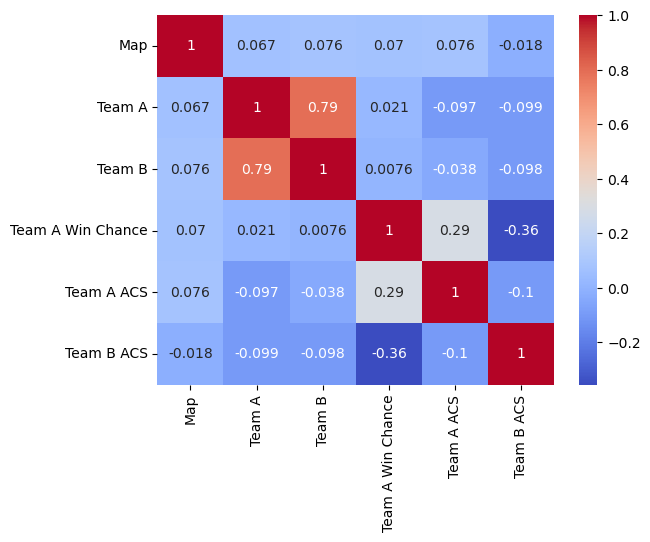

In [140]:
correlation_matrix = merged_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [141]:
#Complete logistic for all probability and recent 5 games probability before calling this function
def calculate_upset_probability(season_prob, recent_prob, weight_recent=0.55, num_simulations=10000):
    """
    Calculate the probability of an upset and the confidence in the prediction.
    
    :param season_prob: Probability of Team A winning based on season-long data
    :param recent_prob: Probability of Team A winning based on recent 5 matches
    :param weight_recent: Weight given to recent performance (0 to 1)
    :param num_simulations: Number of Monte Carlo simulations to run
    :return: Tuple of (upset_probability, confidence)
    """
    # Combine probabilities with weighted average
    combined_prob = (1 - weight_recent) * season_prob + weight_recent * recent_prob
    
    # Calculate parameters for Beta distribution
    alpha = combined_prob * 100
    beta_param = (1 - combined_prob) * 100
     
    # Run Monte Carlo simulation
    simulations = np.random.beta(alpha, beta_param, num_simulations)
    
    # Calculate upset probability
    upset_probability = np.mean(simulations < 0.5)
    
    # Calculate confidence (as the proportion of simulations within ±10% of the mean)
    confidence = np.mean((combined_prob - 0.1 < simulations) & (simulations < combined_prob + 0.1))
    
    return upset_probability, confidence


In [142]:
upset_prob, confidence = calculate_upset_probability(probability_old[0], probability_y1[0])
print(f"Combined probability of Team A winning: {(probability_old[0] + probability_y1[0]) / 2:.2f}")
print(f"Probability of an upset: {upset_prob:.2f}")
print(f"Confidence in prediction: {confidence:.2f}")

Combined probability of Team A winning: 0.46
Probability of an upset: 0.81
Confidence in prediction: 0.95
